### X-ray image processing

(1024, 1024)
uint8


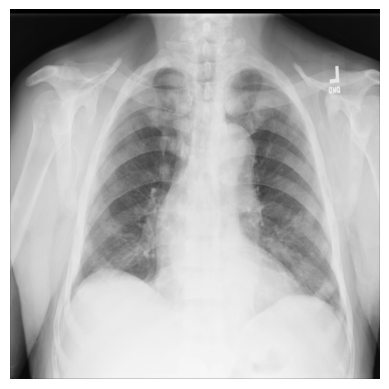

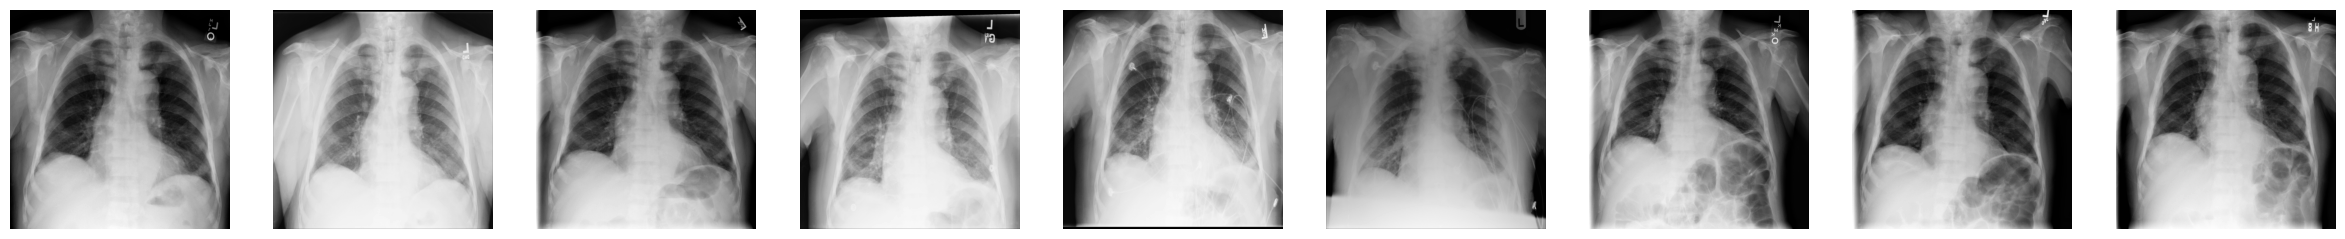

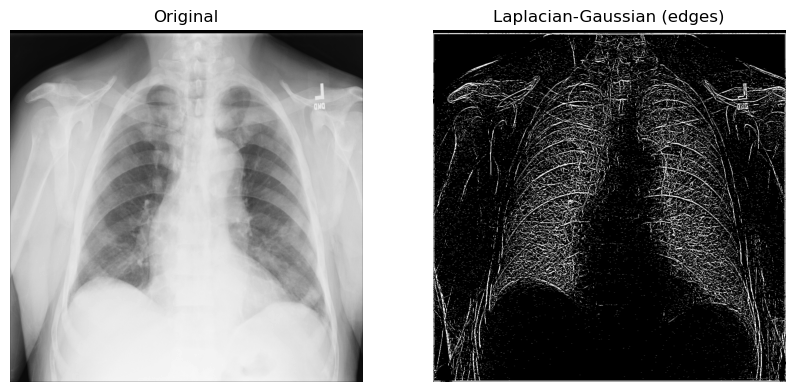

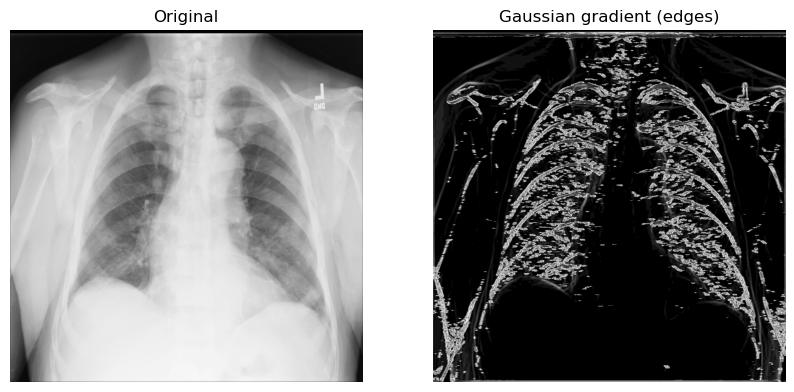

The data type - before:  float16
The data type - after:  float32


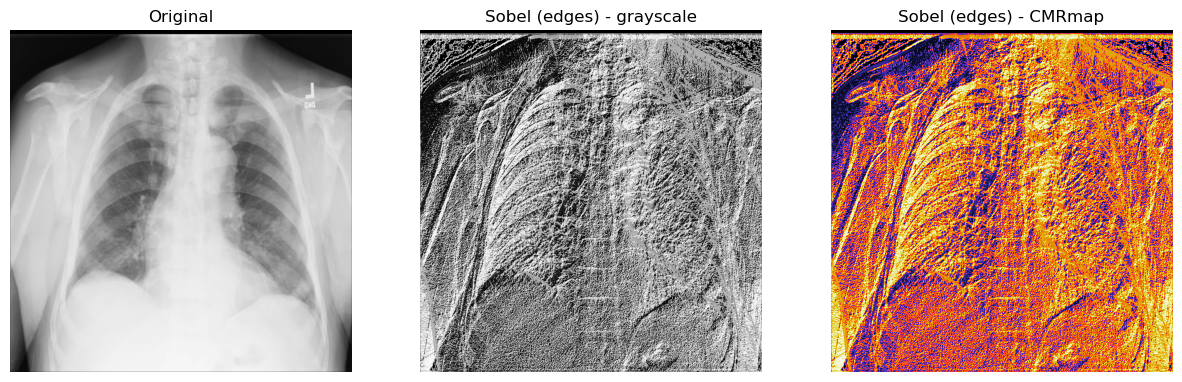

The data type -  float64


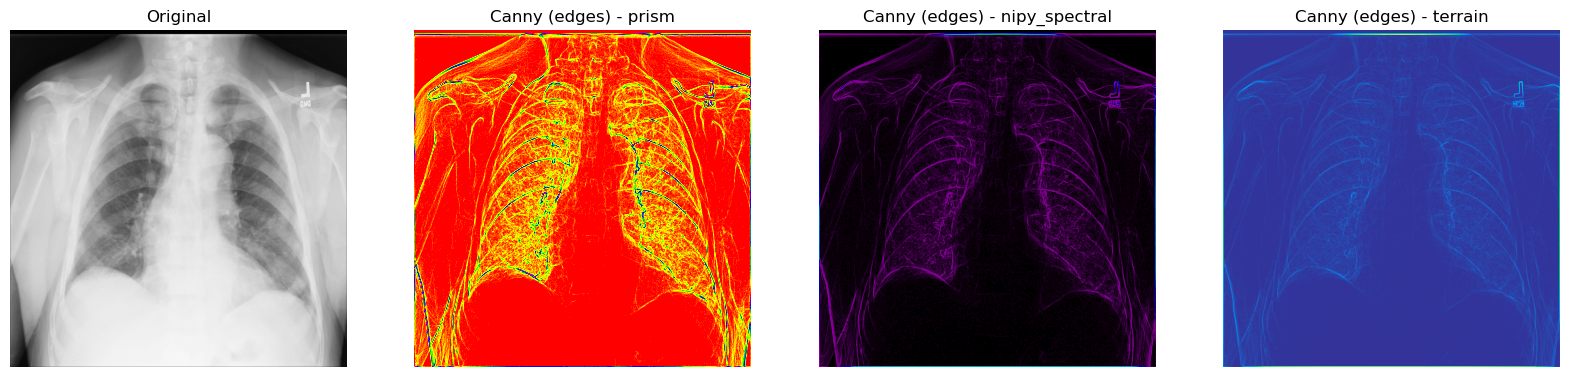

The data type of the X-ray image is:  uint8
The minimum pixel value is:  0
The maximum pixel value is:  255
The average pixel value is:  172.52233219146729
The median pixel value is:  195.0


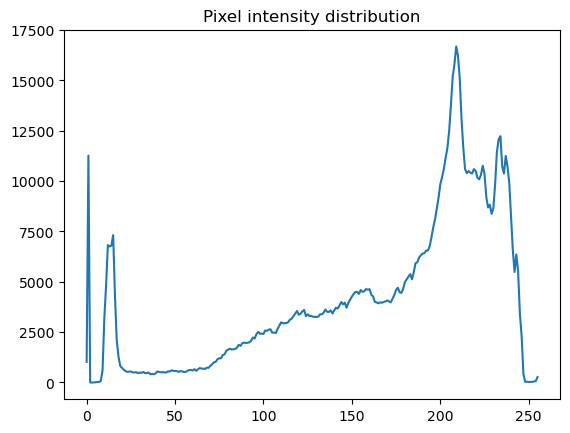

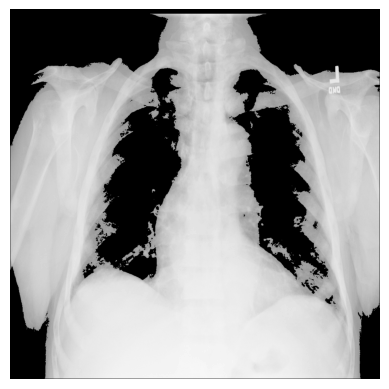

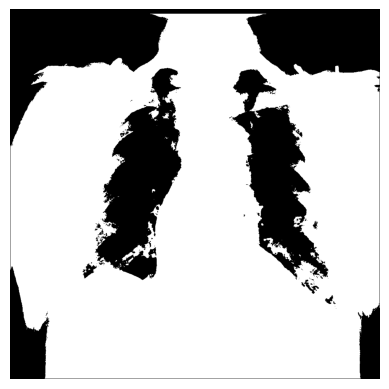

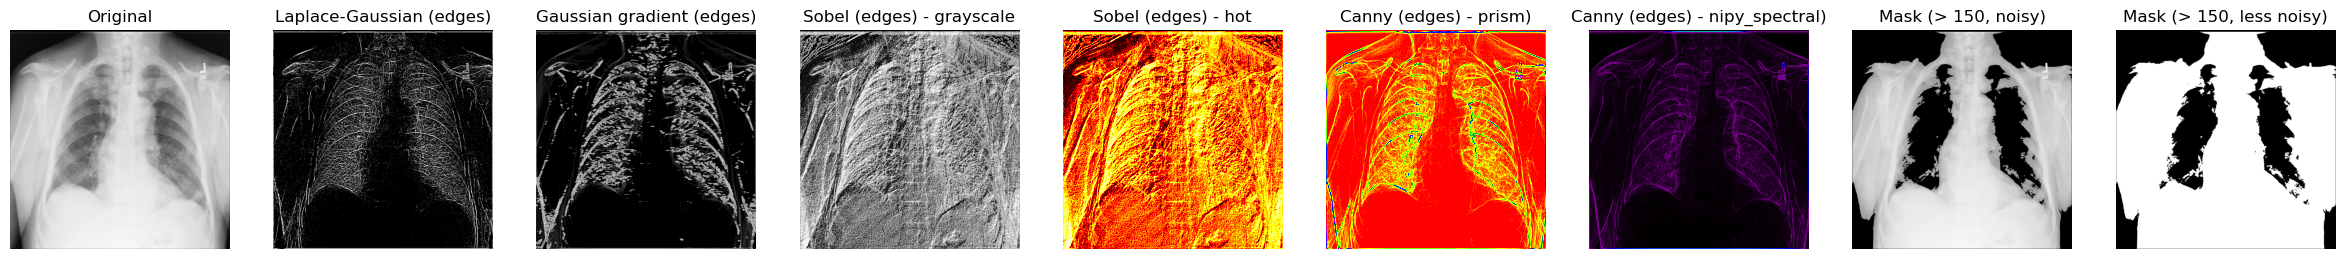

In [10]:
import os
import imageio
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

num_imgs = 9

DIR = "tutorial-x-ray-image-processing"

xray_image = imageio.v3.imread(os.path.join(DIR, "00000011_001.png"))

print(xray_image.shape)
print(xray_image.dtype)

plt.imshow(xray_image, cmap="gray")
plt.axis("off")
plt.show()

combined_xray_images_1 = np.array(
    [imageio.v3.imread(os.path.join(DIR, f"00000011_00{i}.png")) for i in range(num_imgs)]
)

fig, axes = plt.subplots(nrows=1, ncols=num_imgs, figsize=(30, 30))

for img, ax in zip(combined_xray_images_1, axes):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

GIF_PATH = os.path.join(DIR, "xray_image.gif")
imageio.mimwrite(GIF_PATH, combined_xray_images_1, format=".gif", duration=1000)

# The Laplace filter with Gaussian second derivatives
xray_image_laplace_gaussian = ndimage.gaussian_laplace(xray_image, sigma=1)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplacian-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

# The Gaussian gradient magnitude method
x_ray_image_gaussian_gradient = ndimage.gaussian_gradient_magnitude(xray_image, sigma=2)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Gaussian gradient (edges)")
axes[1].imshow(x_ray_image_gaussian_gradient, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

# The Sobel-Feldman operator (the Sobel filter
x_sobel = ndimage.sobel(xray_image, axis=0)
y_sobel = ndimage.sobel(xray_image, axis=1)

xray_image_sobel = np.hypot(x_sobel, y_sobel)
xray_image_sobel *= 255.0 / np.max(xray_image_sobel)

print("The data type - before: ", xray_image_sobel.dtype)
xray_image_sobel = xray_image_sobel.astype("float32")
print("The data type - after: ", xray_image_sobel.dtype)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Sobel (edges) - grayscale")
axes[1].imshow(xray_image_sobel, cmap="gray")
axes[2].set_title("Sobel (edges) - CMRmap")
axes[2].imshow(xray_image_sobel, cmap="CMRmap")
for i in axes:
    i.axis("off")
plt.show()

# The Canny filter
fourier_gaussian = ndimage.fourier_gaussian(xray_image, sigma=0.05)

x_prewitt = ndimage.prewitt(fourier_gaussian, axis=0)
y_prewitt = ndimage.prewitt(fourier_gaussian, axis=1)

xray_image_canny = np.hypot(x_prewitt, y_prewitt)
xray_image_canny *= 255.0 / np.max(xray_image_canny)
print("The data type - ", xray_image_canny.dtype)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))
axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Canny (edges) - prism")
axes[1].imshow(xray_image_canny, cmap="prism")
axes[2].set_title("Canny (edges) - nipy_spectral")
axes[2].imshow(xray_image_canny, cmap="nipy_spectral")
axes[3].set_title("Canny (edges) - terrain")
axes[3].imshow(xray_image_canny, cmap="terrain")
for i in axes:
    i.axis("off")
plt.show()

# Apply masks to X-rays with np.where()
print("The data type of the X-ray image is: ", xray_image.dtype)
print("The minimum pixel value is: ", np.min(xray_image))
print("The maximum pixel value is: ", np.max(xray_image))
print("The average pixel value is: ", np.mean(xray_image))
print("The median pixel value is: ", np.median(xray_image))

pixel_intensity_distribution = ndimage.histogram(
    xray_image, min=np.min(xray_image), max=np.max(xray_image), bins=256
)

plt.plot(pixel_intensity_distribution)
plt.title("Pixel intensity distribution")
plt.show()

# The threshold is "greater than 150"
# Return the original image if true, `0` otherwise
xray_image_mask_noisy = np.where(xray_image > 150, xray_image, 0)

plt.imshow(xray_image_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()

# The threshold is "greater than 150"
# Return `1` if true, `0` otherwise
xray_image_mask_less_noisy = np.where(xray_image > 150, 1, 0)

plt.imshow(xray_image_mask_less_noisy, cmap="gray")
plt.axis("off")
plt.show()

# Compare the results
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 30))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplace-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
axes[2].set_title("Gaussian gradient (edges)")
axes[2].imshow(x_ray_image_gaussian_gradient, cmap="gray")
axes[3].set_title("Sobel (edges) - grayscale")
axes[3].imshow(xray_image_sobel, cmap="gray")
axes[4].set_title("Sobel (edges) - hot")
axes[4].imshow(xray_image_sobel, cmap="hot")
axes[5].set_title("Canny (edges) - prism)")
axes[5].imshow(xray_image_canny, cmap="prism")
axes[6].set_title("Canny (edges) - nipy_spectral)")
axes[6].imshow(xray_image_canny, cmap="nipy_spectral")
axes[7].set_title("Mask (> 150, noisy)")
axes[7].imshow(xray_image_mask_noisy, cmap="gray")
axes[8].set_title("Mask (> 150, less noisy)")
axes[8].imshow(xray_image_mask_less_noisy, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()